# Controle Spectre fit CEF data with Winpexpect

In [2]:
import pexpect as wpe
import numpy as np
import time
import re
import os
import fnmatch

import matplotlib.pyplot as plt
#import seaborn as sns # it will set to SNS style
#sns.reset_orig() # set back to the Matplotlib style
#sns.set() # set to sns style
# set the font
#plt.rcParams["font.family"] = 'arial'
%matplotlib notebook

In [ ]:
'''
1. only after 'child.expect(...)' can you use child.befor or ...
2. 'child.expect()' give the output since last 'expect' till this one

'''

In [6]:
# Calcualte the fitted relative intensity LaSmZO_5K_39meV_I-E_Qs)
print np.array([0.0262+0.0149, 0.1153+0.0083, 0.0331+0.0017, 0.4856+0.0988, 0.3683+0.0019, 
                0.6768+0.0425,0.9689+0.0443])/(1.5766+0.0058)
#from the first excited state to the highers
print np.array([0.0028+0.0037, 0.0031+1.0097, 0.0448+0.0002,0.0233+1.8794,0.1170+0.0091])/(1.5766+0.0058)

[ 0.02597321  0.0781092   0.02199191  0.36931244  0.23394843  0.45456269
  0.64029323]
[ 0.00410768  0.64004044  0.02843782  1.20241405  0.07968908]


In [15]:
#(14.95*8+3.75*3+2.85+58.99)*7.8

eval('{:0}+{:1}'.format(1,2))

3

## Define functions

In [6]:
# Ｓｔａｒｔｅ　Ｓｐｅｃｔｒｅ　ａｎｄ　ｓｅｔ　ＣＥＦ　ｐａｒａｍｅｔｅｒｓ
def console(**kwargs):
    set_pars = []
    if kwargs:
        for kw in kwargs:
            if kw=='set_pars': set_pars=kwargs[kw]                
    #start Spectre
    proc= wpe.winspawn(r'C:\windows\system32\cmd.exe')
    proc.writelines(['D:\n','cd D:\9_Program files\crystal_field\n','spectre.exe\n'])
    #set parameters
    if set_pars:
        #print '\n'.join(set_pars)
        proc.writelines('\n'.join(set_pars)+'\n')
        proc.write('\n')          
    return(proc)

# Ｆｉｔ　ＣＥＦ　ｄａｔａ
def fit_cef(proc,cmds):
    proc.writelines(('\n'+'4'+'\n'+'\n'+'\n'.join(cmds)+'\n'+'\n'+'\n'+'n'+'\n'))

#　Ｃａｌｃｕｌａｔｅｄ　Chi-T
def cal_xt(proc,maxT,fname):# The last two input must be strings
    proc.writelines('\n'+ '6 \n' + maxT+'\n' +'y \n' +fname+'\n')
    return    
    
#　Ｃａｌｃｕｌａｔｅｄ　Ｃｐ    
# The five Cp functions all work  
def cal_cp(child,T_range_npts,fname):# The last two input must be strings
    child.writelines('\n'+'5'+'\n'+ T_range_npts+'\n'+ 'y'+'\n' +fname+'\n')
    return
# func below： should add '\n' to T_range_npts,fname
def cal_cp0(child,T_range_npts,fname):# The last two input must be strings
    child.sendline(' ')
    child.sendline('5')
    child.sendline(T_range_npts)
    child.sendline('y')
    child.sendline(fname)
    return
def cal_cp1(child,T_range_npts,fname):# The last two input must be strings
    child.writelines(['\n', '5\n', T_range_npts, 'y\n', fname])
    return
def cal_cp2(child,T_range_npts,fname):# The last two input must be strings
    child.writelines('\n'+'5\n'+T_range_npts+'y\n'+fname)
    return
def cal_cp3(child,T_range_npts,fname):# The last two input must be strings
    child.writelines('\n'+'5'+'\n'+ T_range_npts+ 'y'+'\n' +fname)
    return

## Testing functions

In [5]:
# start Spectre
child= wpe.winspawn(r'C:\windows\system32\cmd.exe')

#Blow both two work. 
# We do not need \n with sendline func or cmd.exe?
# child.sendline('D:')
# child.sendline('cd D:\9_Program files\crystal_field')
# child.sendline('spectre.exe')

#We need \n with writelines for writelines or Spectra?
child.writelines(['D:\n','cd D:\9_Program files\crystal_field\n','spectre.exe\n'])
#child.sendline(' ')# to menue if with \n, wrong

next_line = child.readline()
while next_line != '':
    print(next_line.strip())
    next_line = child.readline()

#print child.read()

#Print output(it will waite for timeout!!!)
# for line in child:
#     print line.rstrip('\n')

child.close()

#Try to export to a file: not working
# child.expect(wpe.EOF)
# fout = file('D:\9_Program files\crystal_field\mylogfile.txt','w')
# child.logfile = fout  
# print(child.before)


# try:
#     os.remove(r'D:\9_Program files\crystal_field\mylogfile.txt')
# except:
#     pass

#cal_cp3(child,'2 300 100\n','mylogfile.txt\n')



Microsoft Windows [Version 6.1.7601]
Copyright (c) 2009 Microsoft Corporation.  All rights reserved.

C:\Users\kew\0_MyIpython\Crystal_field>D:
D:\>cd D:\9_Program files\crystal_field
D:\9_Program files\crystal_field>spectre.exe




CEF Parameters (meV):

1  B(2,0) =  0.553E+02  2  B(4,0) =  0.370E+03  3  B(6,0) =  0.114E+03
4  B(2,1)c =  0.000E+00  16  B(2,1)s =  0.000E+00
5  B(2,2)c =  0.000E+00  17  B(2,2)s =  0.000E+00
6  B(4,1)c =  0.000E+00  18  B(4,1)s =  0.000E+00
7  B(4,2)c =  0.000E+00  19  B(4,2)s =  0.000E+00
8  B(4,3)c =  0.128E+03  20  B(4,3)s =  0.000E+00
9  B(4,4)c =  0.000E+00  21  B(4,4)s =  0.000E+00
10  B(6,1)c =  0.000E+00  22  B(6,1)s =  0.000E+00
11  B(6,2)c =  0.000E+00  23  B(6,2)s =  0.000E+00
12  B(6,3)c = -0.114E+03  24  B(6,3)s =  0.000E+00
13  B(6,4)c =  0.000E+00  25  B(6,4)s =  0.000E+00
14  B(6,5)c =  0.000E+00  26  B(6,5)s =  0.000E+00
15  B(6,6)c =  0.120E+03  27  B(6,6)s =  0.000E+00

Exchange field (He) and applied field (B):

28 Hex =  0.000E+00  2

TIMEOUT: Timeout exceeded in read_nonblocking().
<winpexpect.winspawn object at 0x000000000846C160>
command: C:\windows\system32\cmd.exe
args: ['C:\\windows\\system32\\cmd.exe']
searcher: searcher_re:
    0: re.compile("
")
    1: EOF
buffer (last 100 chars): D:\9_Program files\crystal_field>
before (last 100 chars): D:\9_Program files\crystal_field>
after: <class 'winpexpect.TIMEOUT'>
match: None
match_index: None
exitstatus: None
flag_eof: False
pid: 13296
child_fd: 5
closed: False
timeout: 30
delimiter: <class 'winpexpect.EOF'>
logfile: None
logfile_read: None
logfile_send: None
maxread: 2000
ignorecase: False
searchwindowsize: None
delaybeforesend: 0.05
delayafterclose: 0.1
delayafterterminate: 0.1

In [ ]:
child.close()

In [11]:
# fitting

# set initio pars
sm_pars =  ['1,42',  '2,320', '3,103', '8,85', '12,-70', '15,96']# Scaled Nd2Zr2O7 pars
nd_pars =  ['1,49.2',  '2,408.9', '3,148.1', '8,121.6', '12,-98', '15,139.1']# Scaled Nd2Zr2O7 pars
#sm_pars =  ['1,90',  '2,320', '3,103', '8,85', '12,-70', '15,92']# modified Scaled Nd pars
sm_pars1 = ['1 28.5','2 370', '3 86',  '8 97', '12 -78', '15 123']# JPCM paper Sm2Ti2O7
#sm_pars1 = ['1 70',  '2 370', '3 86',  '8 97', '12 -78', '15 123']# Modified JPCM paper Sm2Ti2O7
sm_pars2 = ['1,47',  '2,294', '3,83',  '8,109','12,-62', '15,110']# Scaled Pr2Sn2O7 pars
sm_pars3 = ['1,28',  '2,289', '3,95',  '8,131','12,-64', '15,102']# Scaled Pr2Hf2O7 pars
#last = ['1,97', '2,412', '3,150',  '8,75','12,-100', '15,103']# Scaled Pr2Hf2O7 pars
test = ['1,0',  '2,0', '3,0',  '8,0','12,0', '15,0']# Scaled Pr2Hf2O7 pars
proc = console(set_pars = nd_pars) #sm_pars1)
# proc.expect(...)
# print proc.before
# print proc.after

In [12]:
proc.close()
print np.array([165,185])/8.066

[ 20.45623605  22.93577982]


In [4]:

proc = console(set_pars = sm_pars3)

# fitting 9deg cut data
fitcmd=['e','1 2 0 0.1', '1 7 130 3','1 8 130 3', '1 9 157 5','1 10 157 5',
        '1 11 168 5','1 12 168 5', '1 13 183 5','1 14 183 5 \n',
       'c','1 7','1 8 \n', 'c','1 9','1 10 \n', 'c','1 11', '1 12 \n',
       'c','1 13', '1 14 \n',
        'r', '6 1 7','6 1 13','0.37 0.05',
             '6 1 9','6 1 13','0.26 0.08',
             '6 1 11','6 1 13','0.38 0.08 \n',
        'v','1','2','3','8','12','15']

# with assumed neutrond data for the intra-multiplet transtions below 35meV
fitcmd=['e','1 2 0 0.1',
        '1 3 10 3', '1 4 10 3', '1 5 26 5', '1 6 26 5',
        '1 7 130 3','1 8 130 3', '1 9 157 5','1 10 157 5',
        '1 11 168 5','1 12 168 5', '1 13 183 5','1 14 183 5 \n',
        'c','1 3','1 4 \n', 'c','1 5','1 6 \n',
        'c','1 7','1 8 \n', 'c','1 9','1 10 \n', 'c','1 11', '1 12 \n','c','1 13', '1 14 \n',      
        'r', '6 1 3','6 1 13','0.01 0.005',
             '6 1 5','6 1 13','0.01 0.005',
             '6 1 7','6 1 13','0.37 0.05',
             '6 1 9','6 1 13','0.26 0.08',
             '6 1 11','6 1 13','0.38 0.08 \n',
        'v','1','2','3','8','12','15']

# with assumed neutrond data for the intra-multiplet transtions below 35meV
# fitcmd=['e','1 2 0 0.1',
#         '1 3 20.5 0.1', '1 4 20.5 0.1', '1 5 23 0.1', '1 6 23 0.1',
#         '1 7 130 3','1 8 130 3', '1 9 157 5','1 10 157 5',
#         '1 11 168 5','1 12 168 5', '1 13 183 5','1 14 183 5 \n',
#         'c','1 3','1 4 \n', 'c','1 5','1 6 \n',
#         'c','1 7','1 8 \n', 'c','1 9','1 10 \n', 'c','1 11', '1 12 \n','c','1 13', '1 14 \n',      
#         'r', '6 1 3','6 1 13','0.01 0.005',
#              '6 1 5','6 1 13','0.01 0.005',
#              '6 1 7','6 1 13','0.37 0.05',
#              '6 1 9','6 1 13','0.26 0.08',
#              '6 1 11','6 1 13','0.38 0.08 \n',
#         'v','1','2','3','8','12','15']

# Test swapping the two peak close to each other
fitcmd1=['e','1 2 0 0.1', '1 7 130 3','1 8 130 3', '1 9 168 5','1 10 168 5',
        '1 11 157 5','1 12 157 5', '1 13 183 5','1 14 183 5 \n',
       'c','1 7','1 8 \n', 'c','1 9','1 10 \n', 'c','1 11', '1 12 \n',
       'c','1 13', '1 14 \n',
        'r', '6 1 7','6 1 13','0.37 0.05',
             '6 1 9','6 1 13','0.38 0.08',
             '6 1 11','6 1 13','0.26 0.08 \n',
        'v','1','2','3','8','12','15']

#Test searching the key words: cannot use regular reprezentation????
fit_cef(proc,fitcmd)
proc.close()

#i=proc.expect(['ERROR!   IFAIL =','CHI SQUARED', wpe.EOF, wpe.TIMEOUT])
# i=proc.expect(['ERROR! CHI SQUARED', wpe.EOF, wpe.TIMEOUT])
# if i==0:
#     print 'Failed', '\n' , proc.before
# elif i==1:
#     print 'Sucess','\n', proc.before
    
#j=proc.expect(['^B(2,0).*B(4,0)$', wpe.EOF, wpe.TIMEOUT])
#j=proc.expect([r'B\(2,0\)', wpe.EOF, wpe.TIMEOUT])
#j=proc.expect(['/\AB\(2,0\).*B\(4,0\)\Z/m', wpe.EOF, wpe.TIMEOUT])
#j=proc.expect(['\B\(2,0\)(.*)(\w+\s?\w*)B\(2,1\)\s', wpe.EOF, wpe.TIMEOUT])
# import re
# pattern = re.compile(r"IFAIL(.+)(?:\n|\r\n?)((?:(?:\n|\r\n?).+)+)B\(2,1\)s", re.MULTILINE)
# j=proc.expect([pattern, wpe.EOF, wpe.TIMEOUT])

#j=proc.expect(['/\AERROR.*Details\Z/m', wpe.EOF, wpe.TIMEOUT])
#j=proc.expect(['ERROR', wpe.EOF, wpe.TIMEOUT])
#/\ACTR.*\Z/m
#^B(2,0).*B(2,1)$
# if j==0:
#     print 'Found',proc.match.group(0)
# else:
#     print 'Not found'
    
# k=proc.expect(['Details', wpe.EOF, wpe.TIMEOUT])
# if k==0:
#     print 'ok', proc.before, proc.match.group(0)
# else:
#     print 'not found'

# add this to loop to avoid repeated output
#http://stackoverflow.com/questions/29585522/python-pexpect-clearing-or-flushing-the-line
# if child.before:
#     child.expect (r'.+') 

In [86]:
proc.close()

## Run loop with random initio parameters

In [8]:
# Ｌｏｏｐｓ　ｗｉｔｈ　ｒａｎｄｏｍｓ　ｐａｒａｍｅｔｅｒ　ｗｉｔｈ　ａ　ｒａｎｇｅ　ｏｆ　１００　ｌａｒｇｅ　ａｒｏｕｎｄ　ｔｈｅ　ｐａｒｓ　ｏｆ　ｓｃａｌｅｄ　Ｎｄ
# tried capture output (time consuming) 'with wp.expect' and copy the content of 'RESULT.DAT' (sometimes fails)
# Last used: copy file 'RESULT.DAT' every time and store starting parameters to a file
storage = []
idxs = ['1','2','3','8','12','15']
iters=0
import shutil
start = time.time()

#start Spectre
proc= wpe.winspawn(r'C:\windows\system32\cmd.exe')
proc.writelines(['D:\n','cd D:\9_Program files\crystal_field\n','spectre.exe\n'])

pattern = re.compile(r"IFAIL(.+)(?:\n|\r\n?)((?:(?:\n|\r\n?).+)+)B\(2,1\)s", re.MULTILINE)

#f = open(r"D:\9_Program files\crystal_field\RESULT.DAT","r")
f1 = open(r"D:\9_Program files\crystal_field\Myout.txt", "w")

while iters<100:
    # set initio parameters (plus randoms)
    print iters
    randoms = np.random.rand(6)*100
    cefp = map(str, np.array([42,320,103,85,-70,96])+randoms)
    #set parameters 
    for idx, par in zip(idxs,cefp):
        #print idx+' '+par+'\n'
        proc.write(idx+' '+par+'\n')
    proc.write('\n') 
    # fitting
    proc.writelines('\n'+'4'+'\n'+'\n'+'\n'.join(fitcmd)+'\n'+'\n'+'\n'+'y'+'\n')
    # store key factors
#     proc.expect([pattern, wpe.EOF, wpe.TIMEOUT])
#     storage.append(cefp)
#     storage.append(proc.match.group(0))
#     i=proc.expect(['ERROR', wpe.EOF, wpe.TIMEOUT])
#     if i==0:
#         storage.append('Error')
#     else:
#         #i=proc.expect(['Details', wpe.EOF, wpe.TIMEOUT])
#         storage.append(cefp)
    #time.sleep(2)
    for p in cefp:
        #print p
        f1.write(p + '\n')
    shutil.copy(r"D:\9_Program files\crystal_field\RESULT.DAT", r"D:\9_Program files\crystal_field\Output\RESUL0T%d.DAT"%iters)    
#     for line in f:
#         f1.write(line)
    iters = iters+1 
    
    # set initio parameters (minus randoms)
    if 42<randoms[0]:
        continue
        
    cefp = map(str, np.array([42,320,103,85,-70,96])-randoms)   
    #set parameters 
    for idx, par in zip(idxs,cefp):
        proc.write(idx+' '+par+'\n')
    proc.write('\n') 
    # fitting
    proc.writelines('\n'+'4'+'\n'+'\n'+'\n'.join(fitcmd)+'\n'+'\n'+'\n'+'y'+'\n')# do not write to file
    # store key factors
#     proc.expect([pattern, wpe.EOF, wpe.TIMEOUT])
#     storage.append(cefp)
#     storage.append(proc.match.group(0))
#     i=proc.expect(['ERROR', wpe.EOF, wpe.TIMEOUT])
#     if i==0:
#         storage.append('Error')
#     else:
#         #i=proc.expect(['Details', wpe.EOF, wpe.TIMEOUT])
#         storage.append(cefp)
    for p in cefp:
        #print p
        f1.write(p + '\n')
    shutil.copy(r"D:\9_Program files\crystal_field\RESULT.DAT", r"D:\9_Program files\crystal_field\Output\RESUL1T%d.DAT"%iters)    
#     for line in f:
#         f1.write(line)
            
#print storage 

#f.close()
f1.close()

end = time.time()
print(end - start)

proc.close()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
9122.78600001


In [4]:
# Ｌｏｏｐｓ　ｗｉｔｈ　Ｒａｎｄｏｍ ｐａｒａｍｅｔｅｒ　ｗｉｔｈｉｎ　ａ　ｃｅｒａｔａｉｎ　ｒａｎｇｅ

fpath = r'D:\9_Program files\crystal_field\Output2'
f1 = open(os.path.join(fpath,'Bs_starting2.txt'), "a+") # file to store the starting B parameters
max_iters = 800

import shutil
start = time.time()

#start Spectre
idxs = ['1','2','3','8','12','15']
proc= wpe.winspawn(r'C:\windows\system32\cmd.exe')
proc.writelines(['D:\n','cd D:\9_Program files\crystal_field\n','spectre.exe\n'])

iters=0
while iters<max_iters:
    # set initio parameters (plus randoms)
    print iters
    # for ranges:20-120,320-420,50-150,50-150,-50--100,90-120
    #randoms = np.concatenate([np.random.rand(5)*100,np.random.rand(1)*30])
    #cefp = map(str, np.array([20,320,50,50,-150,90])+randoms)

    # for ranges:50-150,350-450,50-150,50-150,-50--100,90-120
    randoms = np.concatenate([np.random.rand(3)*100, np.random.rand(1)*50, np.random.rand(2)*100])
    cefp = map(str, np.array([50,350,100,50,-150,50])+randoms)
    #set parameters 
    for idx, par in zip(idxs,cefp):
        proc.write(idx+' '+par+'\n')
    proc.write('\n') 
    # write initio par to file
    f1.write(' '.join(cefp))
    f1.write('\n')
    # fitting
    proc.writelines('\n'+'4'+'\n'+'\n'+'\n'.join(fitcmd)+'\n'+'\n'+'\n'+'y'+'\n') 
    shutil.copy(r"D:\9_Program files\crystal_field\RESULT.DAT", os.path.join(fpath,'RESULT2%d.DAT'%iters))
    
    iters = iters+1 

f1.close()

end = time.time()
print(end - start)

proc.close()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

KeyboardInterrupt: 

In [175]:
# test random
randoms = np.concatenate([np.random.rand(3)*100, np.random.rand(1)*50, np.random.rand(2)*100])
cefp = map(str, np.array([50,350,100,50,-150,50])+randoms)
print randoms, cefp

[ 30.05023009  48.41104501  75.60597279  13.58980502  86.35160587
  57.32133653] ['80.0502300883', '398.411045013', '175.605972789', '63.5898050181', '-63.6483941321', '107.321336531']


In [6]:
proc.close()
f1.close()

In [7]:
# Copy the fitted CEF pars and Chi to a file and plot

# Search and match in a text file
#http://stackoverflow.com/questions/10477294/how-do-i-search-for-a-pattern-within-a-text-file-using-python-combining-regex

fpath = r'D:\9_Program files\crystal_field\Output2' #　ｕｓｅｄ　ｔｈｅ　ｓａｍｅ　ｐａｔｈ　ａｂｏｖｅ
fname='RESUL*.DAT'

fnames=[] # store all the right file names in the folder
for file in os.listdir(fpath):
    if fnmatch.fnmatch(file, fname):      
        fnames.append(file)
#print fnames[:2]

# write them to a file
final = open(os.path.join(fpath,'Bs_chi.txt'),"a+") # append writing
final.write(' '.join(['B20','B40','B60','B43','B63','B66','Chi','\n'])) # write headers

for fname in fnames:      
    fname = os.path.join(fpath,fname)
    f = open(fname, 'r')
    ftext = f.read()
    f.close()
    m1 = re.findall("(B\([246],[036]\)[\ *c]?)\s+=\s+(-?\d+\.\d+E[-+]\d+)", ftext)
    m2 = re.findall("(CHI SQUARED)\s+=\s+(\d+\.\d+)", ftext)
    if m1 and m2:
        #print m1, m2 
        final.write(' '.join([m1[0][1],m1[1][1],m1[2][1],m1[3][1],m1[4][1],m1[5][1],m2[0][1],'\n']))
    else:
        final.write(' '.join(['Nan','Nan','Nan','Nan','Nan','Nan','Nan','\n']))# Write 'Nan' for bad fittings with not futll output
        
final.close()  

['RESULT20.DAT', 'RESULT21.DAT']


In [22]:
# load ｆｉｔｔｅｄ　CEF parameters　ａｎｄ　ｃｈｉ
fpath = r'D:\9_Program files\crystal_field\Output2'
dat = np.genfromtxt(os.path.join(fpath,'Bs_chi.txt'), skip_header=1)
chi = dat[:,6] # used for plotting Bs_starting.txt
#dat[~np.isnan(dat[:,0]),:] 
print dat.shape

(704L, 7L)


<IPython.core.display.Javascript object>


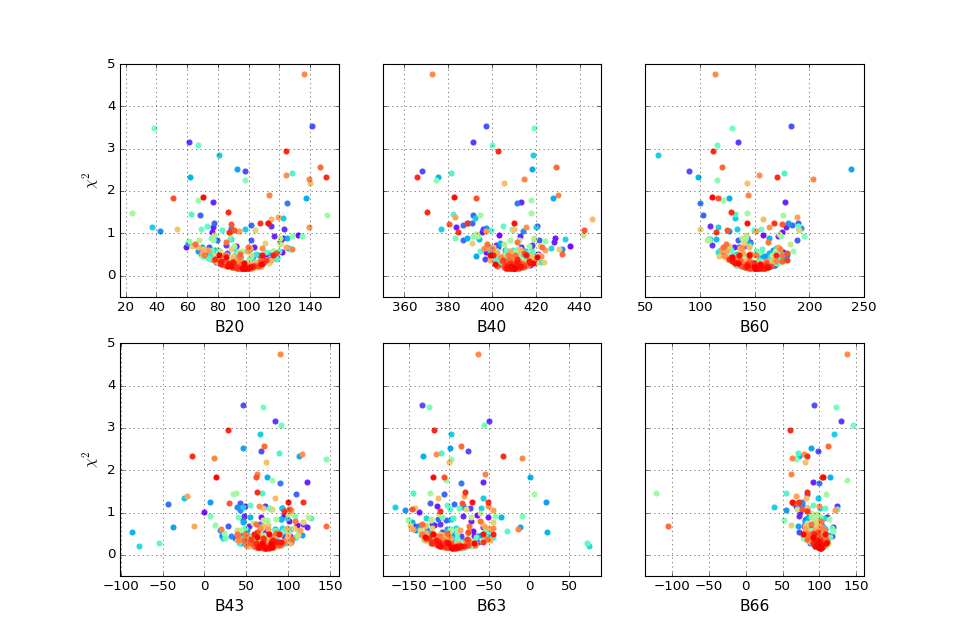

In [30]:
# Plot the CEF parameters vs chi
# Later can try to link those figure(mouse coursor), we can refer the expamle
# http://stackoverflow.com/questions/13306519/get-data-from-plot-with-matplotlib

label = ['B20','B40','B60','B43','B63','B66']

import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, len(dat)))# plot pars of the same set with the same color
    
fig, axs = plt.subplots(nrows=2, ncols=3, sharex=False, sharey=True, figsize=(12,8))
for idx, ax in enumerate(axs.reshape(-1)):
    for x, y, c in zip(dat[:,idx],dat[:,6], colors):
        ax.scatter(x, y, color=c)
    ax.set_xlabel(label[idx],fontsize=14)
    ax.autoscale_view(True,True,True)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.grid(True)
    if idx==0 or idx==3:
        ax.set_ylabel(r'$\chi^2$', fontsize = 14)        
    #ax.plot(dat[:,idx],dat[:,6],'o')

axs[0,0].set_ylim([-0.5,5])    
axs[0,1].set_xlim([350,450])
axs[0,2].set_xlim([50,250])   
#plt.suptitle('Fitted CEF parameters (meV) vs Chi')   
fig.savefig(os.path.join(fpath,'szo_cef_random.pdf'), bbox_inches="tight",verbose=True)  
plt.show()

In [24]:
import plotly.plotly as py
import plotly.graph_objs as go
py.sign_in('jianhui', 'ptwlq2r5kl')

# Create traces
trace0 = go.Scatter(x = chi,y = dat[:,0],mode = 'markers',name = 'B20')
trace1 = go.Scatter(x = chi,y = dat[:,1],mode = 'markers',name = 'B40')
trace2 = go.Scatter(x = chi,y = dat[:,2],mode = 'markers',name = 'B60')
trace3 = go.Scatter(x = chi,y = dat[:,3],mode = 'markers',name = 'B43')
trace4 = go.Scatter(x = chi,y = dat[:,4],mode = 'markers',name = 'B63')
trace5 = go.Scatter(x = chi,y = dat[:,5],mode = 'markers',name = 'B66')
trace00 = go.Scatter(x = chi,y = dat0[:,0],mode = 'markers',name = 'sB20')
trace01 = go.Scatter(x = chi,y = dat0[:,1],mode = 'markers',name = 'sB40')
trace02 = go.Scatter(x = chi,y = dat0[:,2],mode = 'markers',name = 'sB60')
trace03 = go.Scatter(x = chi,y = dat0[:,3],mode = 'markers',name = 'sB43')
trace04 = go.Scatter(x = chi,y = dat0[:,4],mode = 'markers',name = 'sB63')
trace05 = go.Scatter(x = chi,y = dat0[:,5],mode = 'markers',name = 'sB66')

# try to put chi on th chi axis for, grab data base on y axis, failed
# trace0 = go.Scatter(x = dat[:,0],y = chi,mode = 'markers',name = 'B20')
# trace1 = go.Scatter(x = dat[:,1],y = chi,mode = 'markers',name = 'B40')
# trace2 = go.Scatter(x = dat[:,2],y = chi,mode = 'markers',name = 'B60')
# trace3 = go.Scatter(x = dat[:,3],y = chi,mode = 'markers',name = 'B43')
# trace4 = go.Scatter(x = dat[:,4],y = chi,mode = 'markers',name = 'B63')
# trace5 = go.Scatter(x = dat[:,5],y = chi,mode = 'markers',name = 'B66')
# trace00 = go.Scatter(x = dat0[:,0],y = chi,mode = 'markers',name = 'sB20')
# trace01 = go.Scatter(x = dat0[:,1],y = chi,mode = 'markers',name = 'sB40')
# trace02 = go.Scatter(x = dat0[:,2],y = chi,mode = 'markers',name = 'sB60')
# trace03 = go.Scatter(x = dat0[:,3],y = chi,mode = 'markers',name = 'sB43')
# trace04 = go.Scatter(x = dat0[:,4],y = chi,mode = 'markers',name = 'sB63')
# trace05 = go.Scatter(x = dat0[:,5],y = chi,mode = 'markers',name = 'sB66')

layout = go.Layout(
    autosize=False,
    width=1000,
    height=800,
    margin=go.Margin(
        l=0,
        r=0,
        b=0,
        t=0,
        pad=0
    )
)

data = [trace0, trace1, trace2, trace3, trace4, trace5,trace00, trace01, trace02, trace03, trace04, trace05]

fig = go.Figure(data=data, layout=layout)
#py.iplot(data, filename='scatter-mode')# only this also works
py.iplot(fig, filename='scatter-mode')

In [13]:
# plot the starting CEF parameters
dat0 = np.genfromtxt(os.path.join(fpath,'Bs_starting.txt'), skip_header=0)
print dat0.shape

(704L, 6L)


<IPython.core.display.Javascript object>


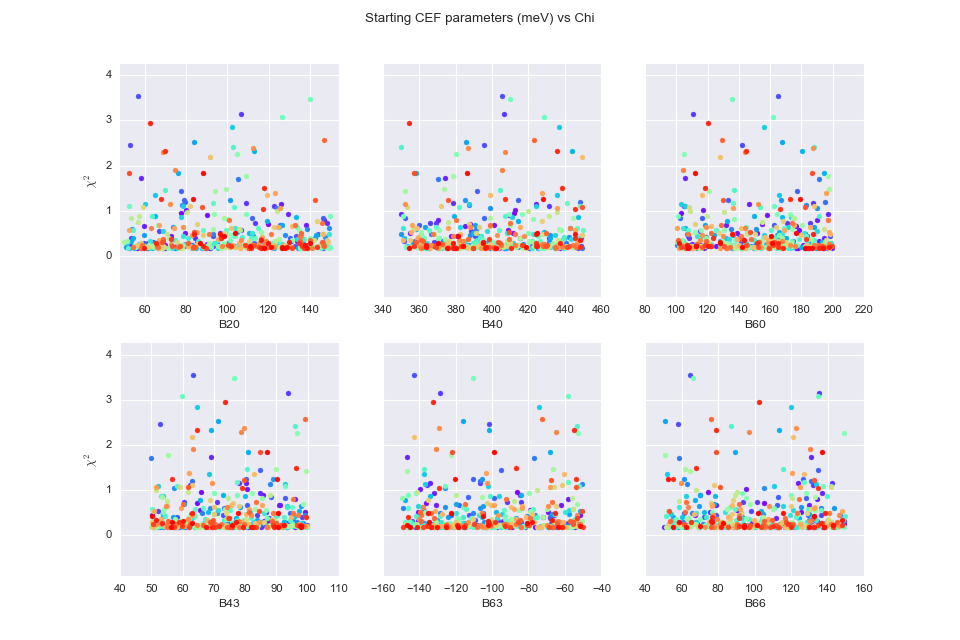

In [14]:
fig, axs = plt.subplots(nrows=2, ncols=3, sharex=False, sharey=True, figsize=(12,8))
for idx, ax in enumerate(axs.reshape(-1)):
    for x, y, c in zip(dat0[:,idx],chi, colors):
        ax.scatter(x, y, color=c)
    ax.set_xlabel(label[idx])
    if idx==0 or idx==3:
        ax.set_ylabel(r'$\chi^2$')
    #ax.plot(dat[:,idx],dat[:,6],'o')
plt.suptitle('Starting CEF parameters (meV) vs Chi')   
plt.show()

In [8]:
# Ｄｏ　ｔｈｅ　ｌａｓｔ　ｆｉｔ　ｗｉｔｈ　ｇｏｏｄ　ｓｔａｒｔｉｎｇ　ｐａｒａｍｅｔｅｒｓ
last = ['1,97', '2,412', '3,150',  '8,75','12,-100', '15,103']
sm_pars2 = ['1,47',  '2,294', '3,83',  '8,109','12,-62', '15,110']# Scaled Pr2Sn2O7 pars
fitcmd=['e','1 2 0 0.1', '1 7 130 3','1 8 130 3', '1 9 157 5','1 10 157 5',
        '1 11 168 5','1 12 168 5', '1 13 183 5','1 14 183 4 \n',
       'c','1 7','1 8 \n', 'c','1 9','1 10 \n', 'c','1 11', '1 12 \n',
       'c','1 13', '1 14 \n',
        'r', '6 1 7','6 1 13','0.37 0.05',
             '6 1 9','6 1 13','0.26 0.08',
             '6 1 11','6 1 13','0.38 0.08 \n',
        'v','1','2','3','8','12','15']

# with assumed neutrond data for the intra-multiplet transtions below 35meV
# fitcmd=['e','1 2 0 0.1',
#         '1 3 10 0.5', '1 4 10 0.5', '1 5 26 1', '1 6 26 1',
#         '1 7 130 3','1 8 130 3', '1 9 157 5','1 10 157 5',
#         '1 11 168 5','1 12 168 5', '1 13 183 5','1 14 183 5 \n',
#         'c','1 3','1 4 \n', 'c','1 5','1 6 \n',
#         'c','1 7','1 8 \n', 'c','1 9','1 10 \n', 'c','1 11', '1 12 \n','c','1 13', '1 14 \n',      
#         'r', '6 1 3','6 1 13','0.01 0.005',
#              '6 1 5','6 1 13','0.01 0.005',
#              '6 1 7','6 1 13','0.37 0.05',
#              '6 1 9','6 1 13','0.26 0.08',
#              '6 1 11','6 1 13','0.38 0.08 \n',
#         'v','1','2','3','8','12','15']

proc = console(set_pars = last)
fit_cef(proc,fitcmd)

# try:
#     os.remove(r'D:\9_Program files\crystal_field\szo_cp.txt')
#     os.remove(r'D:\9_Program files\crystal_field\szo_xt.txt')
# except:
#     pass

# cal_cp(proc,'2 300 100','szo_cp.txt')
# cal_xt(proc,'350','szo_xt.txt')

proc.close()

In [17]:
# read and plot the Cp and XT data
import string
rule = string.maketrans('D', 'E') # make a translation table (rules) for translating a string (D to E in the numbers)  
def load_xt(fname):    
    temp = np.genfromtxt(fname, usecols=(0,1,2,3), \
                         converters = {1: lambda val: float(val.translate(rule)),
                                       2: lambda val: float(val.translate(rule)),
                                       3: lambda val: float(val.translate(rule))}) 
    return temp

# load data
fnames = [r'D:\9_Program files\crystal_field\szo_cp.txt',
          r'D:\5_Neutron Scattering\7_Merlin_Mar_2016_SmZrO\szo_cp_diditalized.txt',
          r'D:\9_Program files\crystal_field\szo_xt.txt',
          r'D:\3_Physical Properties\Nd2Zr2O7\Crystal\szo_pow_xt_080114.txt']
szocp = np.genfromtxt(fnames[0]) # calculated
szocp1 = np.genfromtxt(fnames[1]) # data
szoxt = load_xt(fnames[2]) # calulated
szoxt1 = np.genfromtxt(fnames[3]) # data

<IPython.core.display.Javascript object>


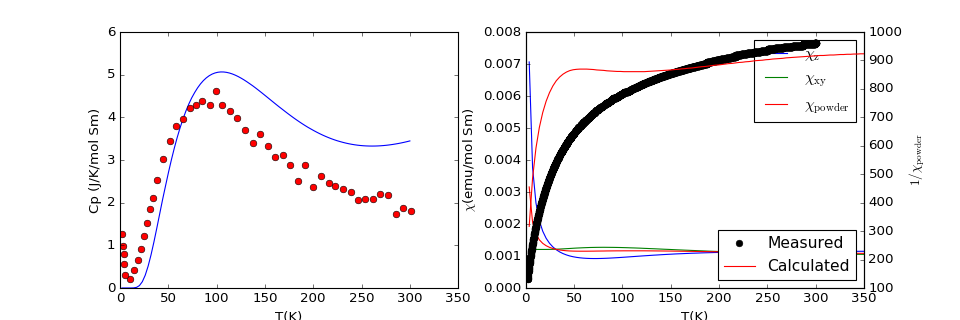

In [18]:
# fast check plot
fig, axs = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(12,4))

# plot Cp
axs[0].plot(szocp[:,0],szocp[:,1])
axs[0].plot(szocp1[:,0],szocp1[:,1],'ro')
axs[0].set_xlabel(r'T(K)')
axs[0].set_ylabel(r'Cp (J/K/mol Sm)')
# plot x-T
axs[1].plot(szoxt[:,0],szoxt[:,1],label=r'$\chi_{\rm z}$')
axs[1].plot(szoxt[:,0],szoxt[:,2],label=r'$\chi_{\rm xy}$')
axs[1].plot(szoxt[:,0],szoxt[:,3],label=r'$\chi_{\rm powder}$')
axs[1].set_xlabel(r'T(K)')
axs[1].set_ylabel(r'$\chi$(emu/mol Sm)')
# plot 1/x-T
axs11 = axs[1].twinx()
axs11.grid(b=False)
axs11.plot(szoxt1[:,0],1./szoxt1[:,1]*2,'o',color='black', label='Measured')
axs11.plot(szoxt[:,0],1./szoxt[:,3],color='r', label='Calculated')
# Make the y-axis label and tick labels match the line color.
for tl in axs11.get_yticklabels():
    tl.set_color('black')
axs11.set_ylabel(r'$1/\chi_{\rm powder}$',color='black')

axs[0].legend(fontsize=14)
axs[1].legend(fontsize=14,loc='best')
axs11.legend(fontsize=14,loc='best',numpoints=1)
plt.show()

<IPython.core.display.Javascript object>


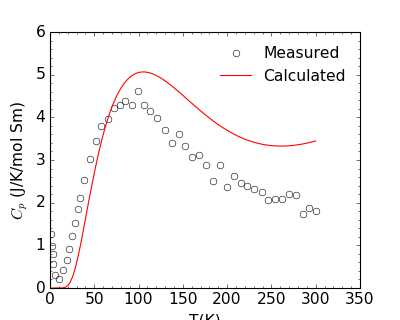

<IPython.core.display.Javascript object>


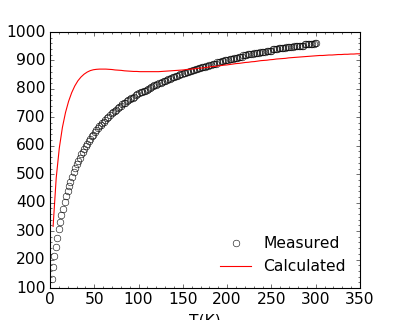

In [23]:
# Export figures
fig = plt.figure(figsize=(5,4))

# plot Cp
plt.plot(szocp1[:,0],szocp1[:,1],linestyle='none', marker='o',mfc='none', mec='black',label='Measured')
plt.plot(szocp[:,0],szocp[:,1],c='r',label='Calculated')
plt.xlabel(r'T(K)',fontsize=14)
plt.ylabel(r'$C_p$ (J/K/mol Sm)',fontsize=14)
plt.minorticks_on()
plt.xticks( color='k', size=14)
plt.yticks( color='k', size=14)
plt.legend(fontsize=14,loc='best',numpoints=1,frameon=False)
#fig.savefig(r'D:\5_Neutron Scattering\7_Merlin_Mar_2016_SmZrO\Sm_cef_cp.pdf', bbox_inches='tight',verbose=True)
plt.show()

# plot 1/x-T
fig = plt.figure(figsize=(5,4))
plt.plot(szoxt1[::20,0],1./szoxt1[::20,1]*2,linestyle='none', marker='o',mfc='none', mec='black', label='Measured')
plt.plot(szoxt[:,0],1./szoxt[:,3],color='r', label='Calculated')
plt.xlabel(r'T(K)',fontsize=14)
plt.ylabel(r'$1/\chi$(emu/mol Sm)',fontsize=14)
plt.minorticks_on()
plt.xticks( color='k', size=14)
plt.yticks( color='k', size=14)
plt.legend(fontsize=14,loc='best',numpoints=1,frameon=False)
#fig.savefig(r'D:\5_Neutron Scattering\7_Merlin_Mar_2016_SmZrO\Sm_cef_xt.pdf', bbox_inches='tight',verbose=True)
plt.show()

# Learn regular expressions 

In [2]:
import re
x="""Top Assembly Part Number        : 800-25858-06
Top Assembly Revision Number    : A0
Version ID                      : V08
CLEI Code Number                : COMDE10BRA
Hardware Board Revision Number  : 0x01


Switch   Ports  Model              SW Version              SW Image
------   -----  -----              ----------              ----------
*    1   52     WS-C3750-48P       12.2(35)SE5             C3750-IPBASE-M
     2   52     WS-C3750-48P       12.2(35)SE5             C3750-IPBASE-M
     3   52     WS-C3750-48P       12.2(35)SE5             C3750-IPBASE-M
     4   52     WS-C3750-48P       12.2(35)SE5             C3750-IPBASE-M


Switch 02
---------
Switch Uptime                   : 11 weeks, 2 days, 16 hours, 27 minutes
Base ethernet MAC Address       : 00:26:52:96:2A:80
Motherboard assembly number     : 73-9675-15"""
re.findall("^(\*?)\s+(\d)\s+\d+\s+([A-Z\d-]+)",x,re.MULTILINE)

[('*', '1', 'WS-C3750-48P'),
 ('', '2', 'WS-C3750-48P'),
 ('', '3', 'WS-C3750-48P'),
 ('', '4', 'WS-C3750-48P')]

In [ ]:
'/[+\-]?(?:0|[1-9]\d*)(?:\.\d*)?(?:[eE][+\-]?\d+)?/'

'''
allowed:
+3
3.2e23
-4.70e+9
-.2E-4
-7.6603

not allowed:
+0003   (leading zeros)
37.e88  (dot before the e)
'''

<IPython.core.display.Javascript object>


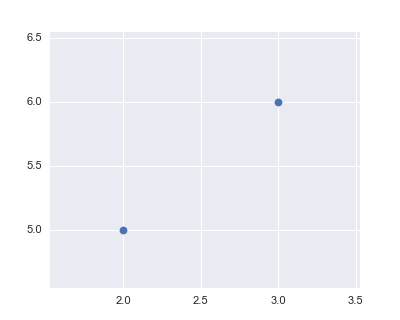

[[ 1.  4.]
 [ 2.  5.]
 [ 3.  6.]]


In [146]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))

ax.plot([1,2,3],[4,5,6],'o')
plt.show()

line = ax.lines[0] # get the first line, there might be more

# print line.get_xdata()

# print line.get_ydata()

print line.get_xydata()

In [1]:

import scipy.spatial as spatial

def fmt(x, y):
    return 'x: {x:0.2f}\ny: {y:0.2f}'.format(x=x, y=y)

class FollowDotCursor(object):
    """Display the x,y location of the nearest data point."""
    def __init__(self, ax, x, y, tolerance=5, formatter=fmt, offsets=(-20, 20)):
        """Create the data cursor and connect it to the relevant figure.
        "artists" is the matplotlib artist or sequence of artists that will be 
            selected. 
        "tolerance" is the radius (in points) that the mouse click must be
            within to select the artist.
        "offsets" is a tuple of (x,y) offsets in points from the selected
            point to the displayed annotation box
        "formatter" is a callback function which takes 2 numeric arguments and
            returns a string
        "display_all" controls whether more than one annotation box will
            be shown if there are multiple axes.  Only one will be shown
            per-axis, regardless. 
        """
        try:
            x = np.asarray(x, dtype='float')
        except (TypeError, ValueError):
            x = np.asarray(mdates.date2num(x), dtype='float')
        y = np.asarray(y, dtype='float')
        self._points = np.column_stack((x, y))
        self.offsets = offsets
        self.scale = x.ptp()
        self.scale = y.ptp() / self.scale if self.scale else 1
        self.tree = spatial.cKDTree(self.scaled(self._points))
        self.formatter = formatter
        self.tolerance = tolerance
        self.ax = ax
        self.fig = ax.figure
        self.ax.xaxis.set_label_position('top')
        self.dot = ax.scatter(
            [x.min()], [y.min()], s=130, color='green', alpha=0.7)
        self.annotation = self.setup_annotation()
        plt.connect('motion_notify_event', self)

    def scaled(self, points):
        points = np.asarray(points)
        return points * (self.scale, 1)

    def __call__(self, event):
        ax = self.ax
        # event.inaxes is always the current axis. If you use twinx, ax could be
        # a different axis.
        if event.inaxes == ax:
            x, y = event.xdata, event.ydata
        elif event.inaxes is None:
            return
        else:
            inv = ax.transData.inverted()
            x, y = inv.transform([(event.x, event.y)]).ravel()
        annotation = self.annotation
        x, y = self.snap(x, y)
        annotation.xy = x, y
        annotation.set_text(self.formatter(x, y))
        self.dot.set_offsets((x, y))
        bbox = ax.viewLim
        event.canvas.draw()

    def setup_annotation(self):
        """Draw and hide the annotation box."""
        annotation = self.ax.annotate(
            '', xy=(0, 0), ha = 'right',
            xytext = self.offsets, textcoords = 'offset points', va = 'bottom',
            bbox = dict(
                boxstyle='round,pad=0.5', fc='yellow', alpha=0.75),
            arrowprops = dict(
                arrowstyle='->', connectionstyle='arc3,rad=0'))
        return annotation

    def snap(self, x, y):
        """Return the value in self.tree closest to x, y."""
        dist, idx = self.tree.query(self.scaled((x, y)), k=1, p=1)
        try:
            return self._points[idx]
        except IndexError:
            # IndexError: index out of bounds
            return self._points[0]

x=[1,2,3,4,5]
y=[6,7,8,9,10]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x, y)
cursor = FollowDotCursor(ax, x, y)
plt.show()

NameError: name 'plt' is not defined